# Cross-response functions

$$ r_{i} (t,\tau) = \log m_{i}(t + \tau) - \log m_{i}(t) = \log \frac{m_{i}(t + \tau)}{m_{i}(t)} $$
$$ R_{ij}^{(exc. 0)}(\tau) = \left \langle r_i(t,\tau) \epsilon_{j} t \right \rangle_t^{(exc. 0)} $$

In [1]:
# Import modules

from matplotlib import pyplot as plt
import numpy as np
import pickle

%matplotlib inline

In [2]:
# Using the only two common stocks in both data sets
ticker_i = 'AAPL'
ticker_j = 'MSFT'
day = '07'

In [3]:
def cross_response_functions(ticker_i, ticker_j, day, tau_val):
    '''
    Obtain the cross response functions using the midpoint log return of ticker i and trade signs of ticker j during
    different time lags. The data is adjusted to use only the values each 1000 ms = 1 s
    
    ticker_i -- String of the abbreviation of the midpoint stock to be analized (i.e. 'AAPL')
    ticker_j -- String of the abbreviation of the trade sign stock to be analized (i.e. 'AAPL')
    day -- String of the day to be analized (i.e '07')
    tau_val -- Maximum time lag to be analyzed
    
    return None
    '''
    
    print('Cross response functions data')
    print('Processing data for the stock i', ticker_i, 'and stock j', ticker_j, 'the day', day + ' March, 2016')
    
    # Load data
    midpoint_i = pickle.load(open('../Data/midpoint_data/midpoint_201603%s_%s.pickl' % (day,ticker_i), 'rb'))
    trade_sign_j = pickle.load(open('../Data/trade_signs_data/trade_signs_most_201603%s_%s.pickl' % (day,ticker_j), 'rb'))
    time = pickle.load(open('../Data/midpoint_data/time.pickl', 'rb'))
    
    # Setting variables to work with 1s accuracy

    cross_response_tau = np.zeros(tau_val)   # Array of the average of each tau. 10^3 s used by Wang

    trade_sign_j_sec = trade_sign_j[::1000] # Using values each second
    trade_sign_j_sec_not0 = trade_sign_j_sec[trade_sign_j_sec != 0] # Using values != 0

    midpoint_i_sec = midpoint_i[::1000] # Using values each second
    time_sec = time[::1000] # Changing time from ms to s
    
    # Calculating the midpoint log return and the cross response functions
    
    for tau in range(1000):
    
        log_return_i_sec = 0. * time_sec # Every second have a log-return
    
        for t_idx in range(len(time_sec)):
            if (t_idx + tau < len(time_sec)):
                log_return_i_sec[t_idx] = np.log(midpoint_i_sec[t_idx + tau] / midpoint_i_sec[t_idx])

        log_return_i_sec_not0 = log_return_i_sec[trade_sign_j_sec != 0]

        cross_response_tau[tau] = np.mean(log_return_i_sec_not0 * trade_sign_j_sec_not0)
    
    # Saving data
    
    pickle.dump(cross_response_tau, open('../Data/cross_response_functions_data/cross_201603%s_%si_%sj.pickl' % (day, ticker_i, ticker_j), 'wb'))
    
    print('Cross response functions data saved')
    print()
    
    return None

In [4]:
cross_response_functions(ticker_i, ticker_j, day, 1000)
cross_response_functions(ticker_j, ticker_i, day, 1000)
cross_response_functions(ticker_i, ticker_i, day, 1000)
cross_response_functions(ticker_j, ticker_j, day, 1000)

Cross response functions data
Processing data for the stock i AAPL and stock j MSFT the day 07 March, 2016
Cross response functions data saved

Cross response functions data
Processing data for the stock i MSFT and stock j AAPL the day 07 March, 2016
Cross response functions data saved

Cross response functions data
Processing data for the stock i AAPL and stock j AAPL the day 07 March, 2016
Cross response functions data saved

Cross response functions data
Processing data for the stock i MSFT and stock j MSFT the day 07 March, 2016
Cross response functions data saved



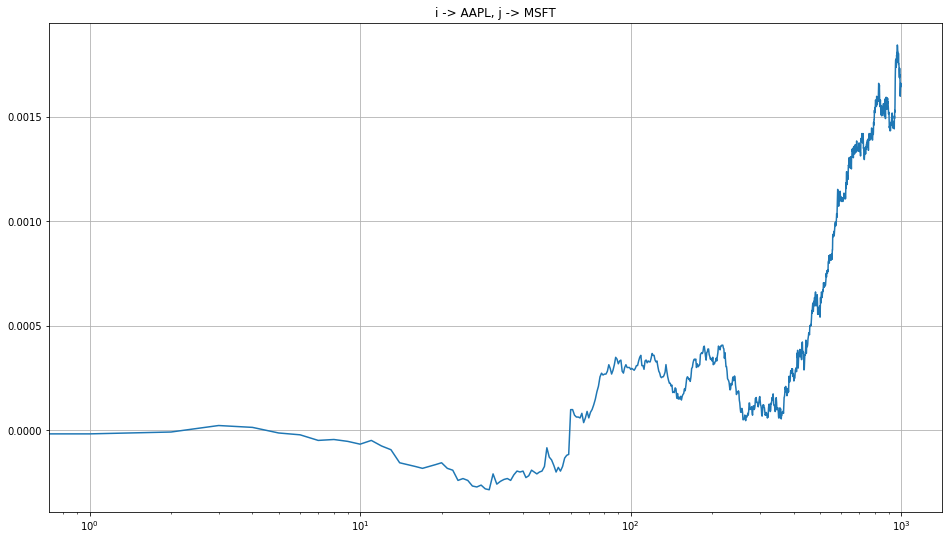

In [5]:
Cross = pickle.load(open('../Data/cross_response_functions_data/cross_201603%s_%si_%sj.pickl' % (day, ticker_i, ticker_j), 'rb'))

plt.figure(figsize=(16,9))

plt.title('i -> %s, j -> %s' % (ticker_i, ticker_j))
plt.semilogx(Cross)
plt.grid(True)

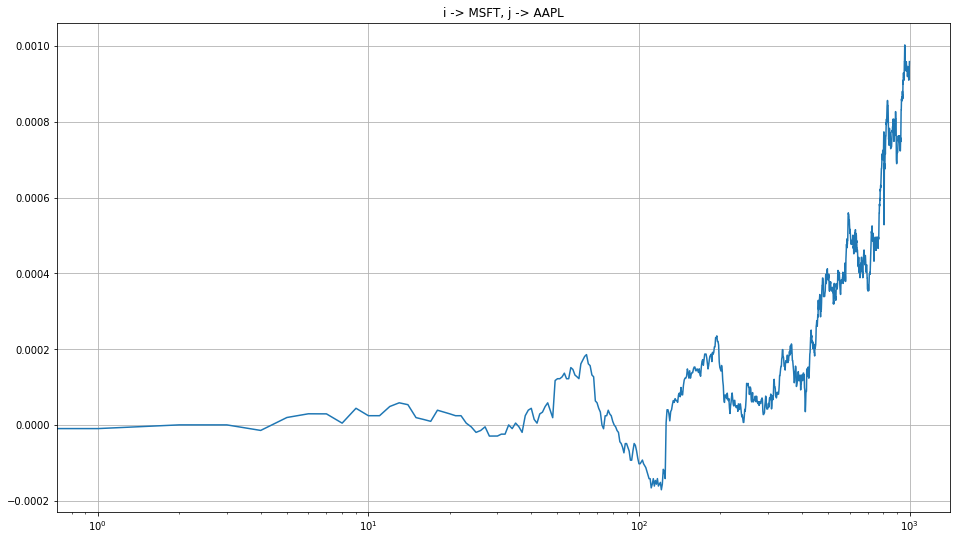

In [6]:
Cross = pickle.load(open('../Data/cross_response_functions_data/cross_201603%s_%si_%sj.pickl' % (day, ticker_j, ticker_i), 'rb'))

plt.figure(figsize=(16,9))

plt.title('i -> %s, j -> %s' % (ticker_j, ticker_i))
plt.semilogx(Cross)
plt.grid(True)

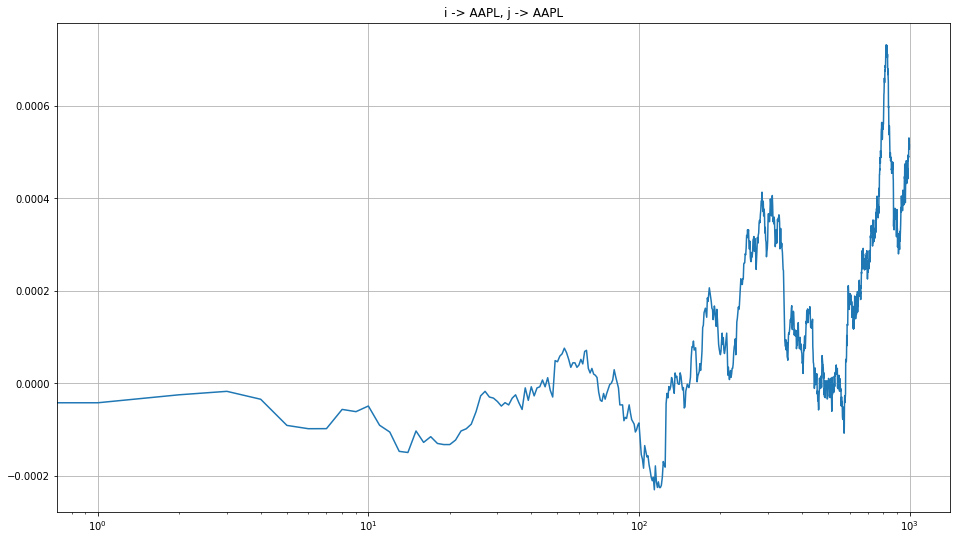

In [7]:
Cross = pickle.load(open('../Data/cross_response_functions_data/cross_201603%s_%si_%sj.pickl' % (day, ticker_i, ticker_i), 'rb'))

plt.figure(figsize=(16,9))

plt.title('i -> %s, j -> %s' % (ticker_i, ticker_i))
plt.semilogx(Cross)
plt.grid(True)

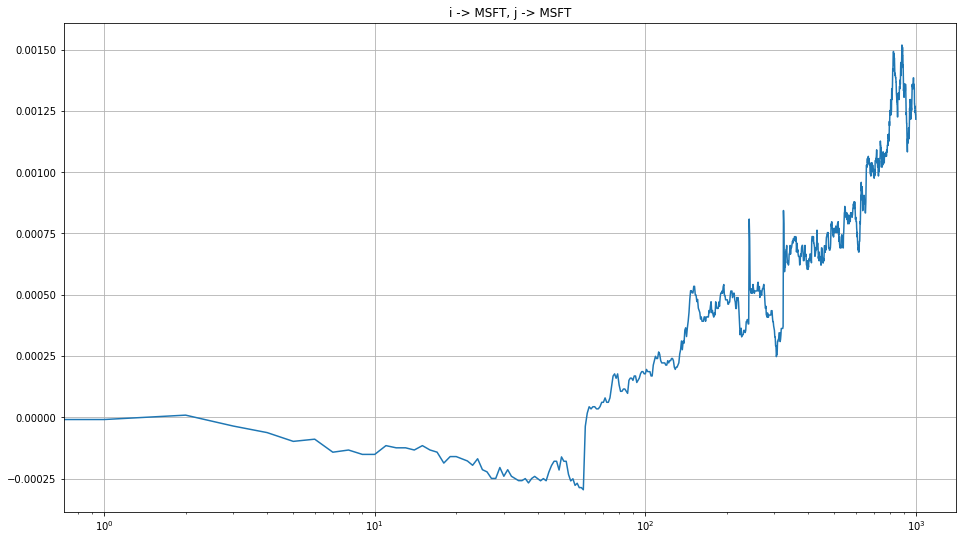

In [8]:
Cross = pickle.load(open('../Data/cross_response_functions_data/cross_201603%s_%si_%sj.pickl' % (day, ticker_j, ticker_j), 'rb'))

plt.figure(figsize=(16,9))

plt.title('i -> %s, j -> %s' % (ticker_j, ticker_j))
plt.semilogx(Cross)
plt.grid(True)

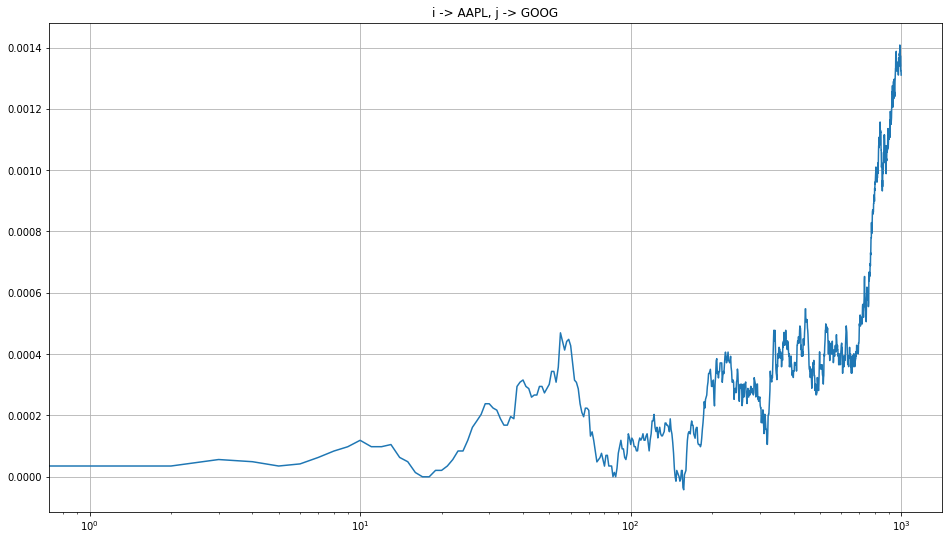

In [9]:
Cross = pickle.load(open('../Data/cross_response_functions_data/cross_201603%s_%si_%sj.pickl' % (day, 'AAPL', 'GOOG'), 'rb'))

plt.figure(figsize=(16,9))

plt.title('i -> %s, j -> %s' % ('AAPL', 'GOOG'))
plt.semilogx(Cross)
plt.grid(True)

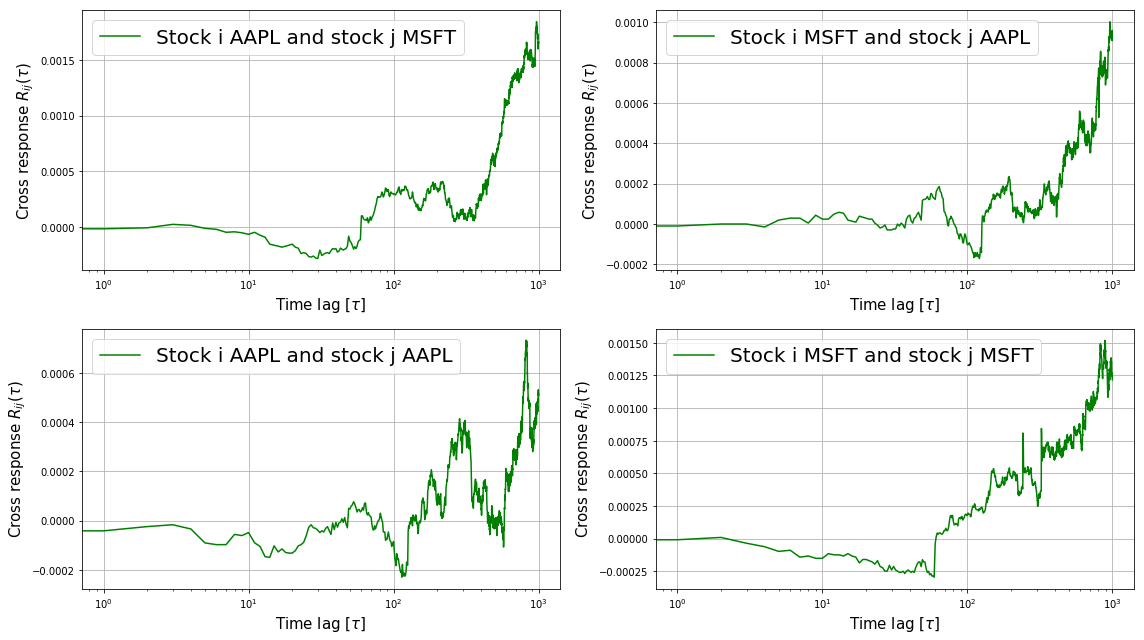

In [10]:
cross1 = pickle.load(open('../Data/cross_response_functions_data/cross_201603%s_%si_%sj.pickl' % (day, ticker_i, ticker_j), 'rb'))
cross2 = pickle.load(open('../Data/cross_response_functions_data/cross_201603%s_%si_%sj.pickl' % (day, ticker_j, ticker_i), 'rb'))
cross3 = pickle.load(open('../Data/cross_response_functions_data/cross_201603%s_%si_%sj.pickl' % (day, ticker_i, ticker_i), 'rb'))
cross4 = pickle.load(open('../Data/cross_response_functions_data/cross_201603%s_%si_%sj.pickl' % (day, ticker_j, ticker_j), 'rb'))

plt.figure(figsize=(16,9))
plt.subplots_adjust(hspace = 0, wspace = 0)

ax1 = plt.subplot(221)
plot1 = plt.semilogx(cross1, '-g', label='Stock i %s and stock j %s' % (ticker_i, ticker_j))
#plt.setp(ax1.get_xticklabels(), visible=False)
plt.xlabel(r'Time lag $[\tau]$', fontsize=15)
plt.ylabel(r'Cross response $ R_{ij} (\tau) $', fontsize=15)
plt.legend(loc='best', fontsize=20)
plt.grid(True)

ax2 = plt.subplot(222)
plot2 = plt.semilogx(cross2, '-g', label='Stock i %s and stock j %s' % (ticker_j, ticker_i))
plt.xlabel(r'Time lag $[\tau]$', fontsize=15)
plt.ylabel(r'Cross response $ R_{ij} (\tau) $', fontsize=15)
#plt.setp(ax2.get_xticklabels(), visible = False)
#plt.setp(ax2.get_yticklabels(), visible = False)
plt.legend(loc='best', fontsize=20)
plt.grid(True)

ax3 = plt.subplot(223)
plot3 = plt.semilogx(cross3, '-g', label='Stock i %s and stock j %s' % (ticker_i, ticker_i))
plt.xlabel(r'Time lag $[\tau]$', fontsize=15)
plt.ylabel(r'Cross response $ R_{ij} (\tau) $', fontsize=15)
plt.legend(loc='best', fontsize=20)
plt.grid(True)

ax4 = plt.subplot(224)
plot4 = plt.semilogx(cross4, '-g', label='Stock i %s and stock j %s' % (ticker_j, ticker_j))
plt.xlabel(r'Time lag $[\tau]$', fontsize=15)
plt.ylabel(r'Cross response $ R_{ij} (\tau) $', fontsize=15)
#plt.setp(ax4.get_yticklabels(), visible = False)
plt.legend(loc='best', fontsize=20)
plt.grid(True)

plt.tight_layout()

plt.savefig('cross_response.png')